# R Exercises - part 2
- Name: Alberto Coppi
- Student ID: 2053063
- E-mail: <alberto.coppi@studenti.unipd.it>

# Import useful libraries

In [1]:
library(ggplot2)
library(gridExtra)

# Ex 1 - Contaminant concentartion

In [298]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

E1 <- sum(x*p1)
E2 <- sum(x*p2)

var1 <- sum((x-E1)^2*p1)
var2 <- sum((x-E2)^2*p2)

cat("Method 1 E[x] and Var[x]: ", E1, '\t', var1, '\n')
cat("Method 2 E[x] and Var[x]: ", E2, '\t', var2)

Method 1 E[x] and Var[x]:  15.959 	 0.033979 
Method 2 E[x] and Var[x]:  15.9622 	 0.02816716

# Ex2 - Doctor's waiting time
## a)

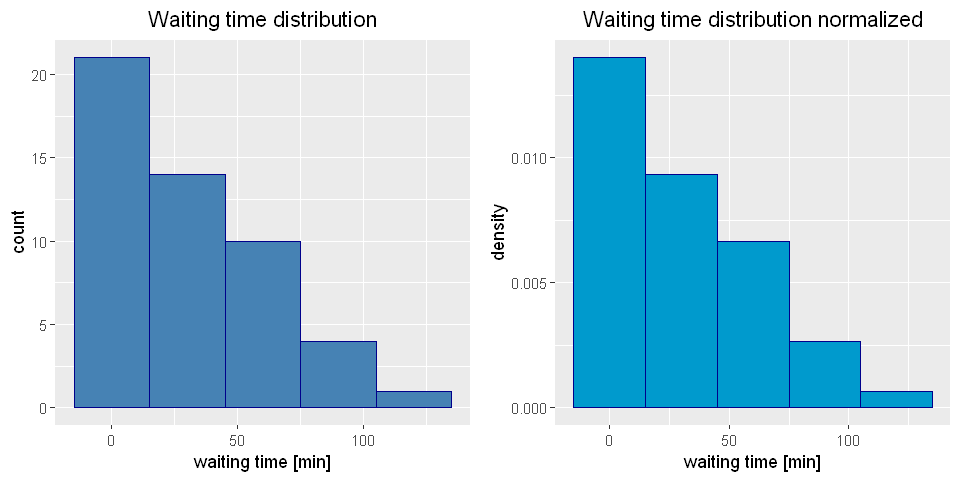

In [327]:
# set random seed for reproducibility
set.seed(1234)

options(repr.plot.width=8, repr.plot.height=4)

lambda = 1/30
x <- rexp(50, lambda)

p1 <- ggplot(mapping=aes(x=x)) + 
      geom_histogram(color='darkblue', fill='steelblue', binwidth=30) + 
      labs(title='Waiting time distribution', x='waiting time [min]') +
      theme(plot.title=element_text(hjust=0.5))
p2 <- ggplot(mapping=aes(x=x, y=after_stat(density))) + 
      geom_histogram(color='darkblue', fill='deepskyblue3', binwidth=30) + 
      labs(title='Waiting time distribution normalized', x='waiting time [min]') +
      theme(plot.title=element_text(hjust=0.5))

grid.arrange(p1, p2, ncol=2)

## b)

In [22]:
p_less10 <- pexp(10, lambda)
cat("Prob. to wait less than 10 minutes:", p_less10, sep='\t')

Prob. to wait less than 10 minutes:	0.2834687

## c)

In [2]:
mean_exp <- mean(x)
mean_th  <- 1/lambda
mean_R   <- integrate(function(x, lambda) {x*dexp(x, lambda)}, 0, Inf, lambda)

cat("Experimental mean:", mean_exp, "\nTheor. mean:", mean_th, "\nR mean:", mean_R$value, sep='\t')

Experimental mean:	24.13319	
Theor. mean:	30	
R mean:	30

## d)

In [28]:
p_more1hr <- 1 - pexp(60, lambda)

cat("Prob. to wait more than 1 hour:", p_more1hr)

Prob. to wait more than 1 hour: 0.1353353

# Ex3 - Typo errors

Prob. of at least one error on specific page: 0.2834687

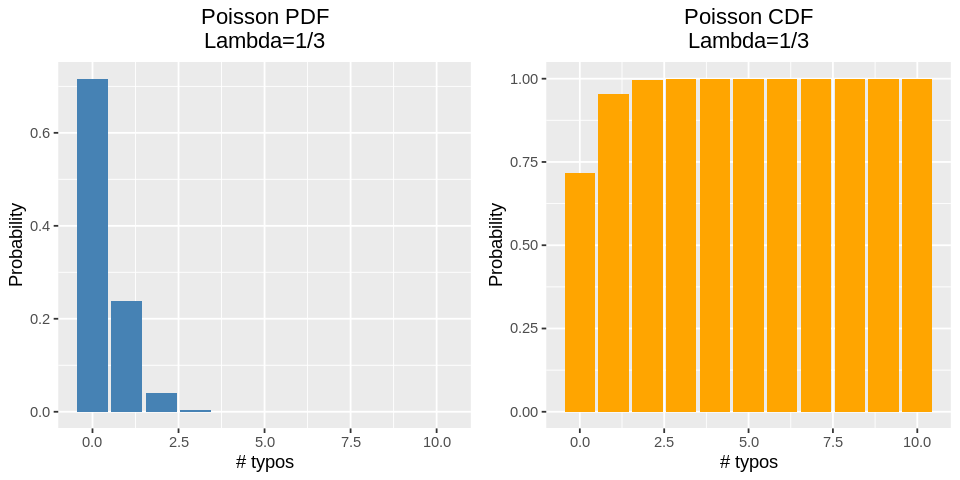

In [13]:
options(repr.plot.width=8, repr.plot.height=4)

lambda <- 1/3
x=seq(0, 10, 1)
df_p <- data.frame(x=x, y=dpois(x, lambda))
df_c <- data.frame(x=x, y=ppois(x, lambda))

# plot pdf and cdf
pdf <- ggplot(df_p, aes(x=x, y=y)) +
       geom_bar(stat='identity', fill='steelblue') +
       labs(title='Poisson PDF\nLambda=1/3', x='# typos', y='Probability') +
       theme(plot.title=element_text(hjust=0.5))
cdf <- ggplot(df_c, aes(x=x, y=y)) +
       geom_bar(stat='identity', fill='orange') +
       labs(title='Poisson CDF\nLambda=1/3', x='# typos', y='Probability') +
       theme(plot.title=element_text(hjust=0.5))

grid.arrange(pdf, cdf, ncol=2)

# probability of at least one error on a specific page
p <- 1-df_c[x==0, 2]
cat("Prob. of at least one error on specific page:", p)

# Ex4 - Draw cards

In [27]:
# we have 4 aces in one deck
p_ace <- 4/52
p     <- pgeom(9, p_ace, lower.tail=F)

# if we use negative binomial x is #failures and n is #success 
p1    <- pnbinom(9, 1, p_ace, lower.tail=F)

cat("Prob. of at least 10 drawns to get one ace:\n\t- with geom:", p, "\n\t- with neg binom:", p1)

Prob. of at least 10 drawns to get one ace:
	- with geom: 0.4491371 
	- with neg binom: 0.4491371

# Ex5 - TOLC-I
## a)

In [328]:
# function to integrate
tolc <- function(c) {
    return(function(t) sapply(t, function(t) {
            if(t>1 && t<2 ) return (c*(t-1)*(2-t))
            else return (0)
        })
    )
}

# theoretical value
c_th  <- 6
# using R integral
c_exp <- 1/integrate(tolc(c=1), lower=1, upper=2)$value
cat("c value must be: ", c_th, ", found value: ", c_exp, sep='')

c value must be: 6, found value: 6

## b)

In [329]:
# define the set of functions
dtolc <- tolc(c=c_th)
ptolc <- function(q, lower.tail=TRUE) sapply(q, function(q, lower.tail) {
            if(q<=1) return (ifelse(lower.tail, 0, 1))
            else if(q>=2) return (ifelse(lower.tail, 1, 0))
            else {
               result <- -1/3*q^3 +3/2*q^2 -2*q
               return (c_th*ifelse(lower.tail, 5/6 + result, -2/3 -result))
            }     
         }, lower.tail)
qtolc <- function(p) sapply(p, function(y) uniroot(function(x, y) ptolc(x)-y, interval=c(1, 2.0), y)$root)
rtolc <- function(n) qtolc(p=runif(n))

Warning message:
"Removed 2 rows containing missing values (geom_bar)."


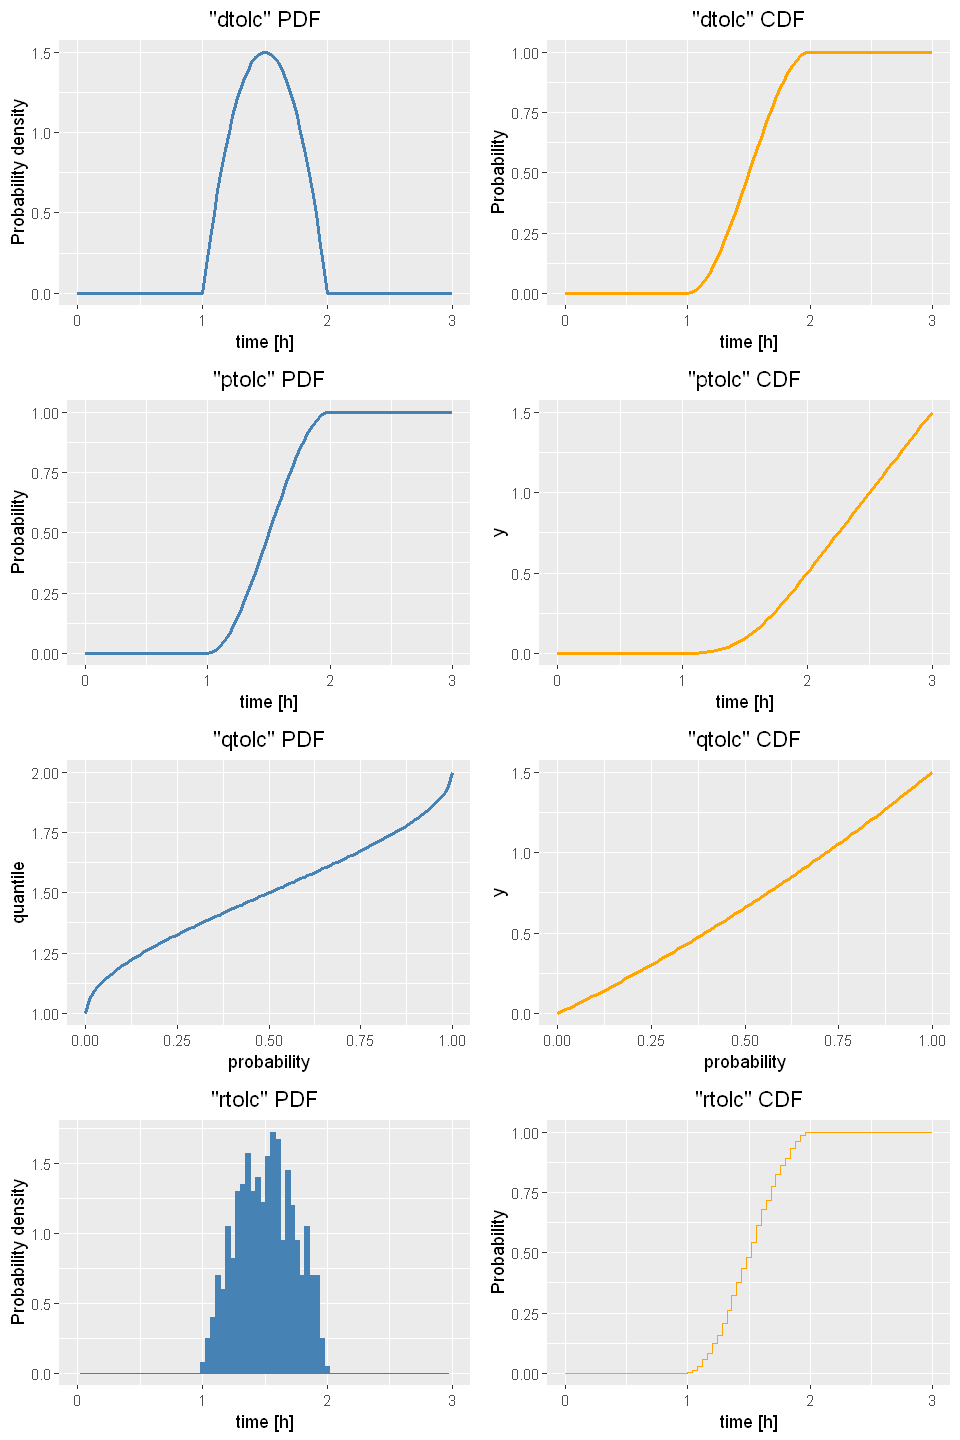

In [331]:
# set random seed for reproducibility
set.seed(1234)

options(repr.plot.width=8, repr.plot.height=12)

# plots for dtolc
x    <- seq(0,3,length.out=100)
df_p <- data.frame(x=x, y=dtolc(x))
df_c <- data.frame(x=x, y=sapply(x, function(x) integrate(dtolc, lower=min(0, x), upper=x)$value))

p1 <- ggplot(df_p, aes(x=x, y=y)) +
      geom_line(color='steelblue', size=1) +
      labs(title='"dtolc" PDF', x='time [h]', y='Probability density') +
      theme(plot.title=element_text(hjust=0.5))
p2 <- ggplot(df_c, aes(x=x, y=y)) +
      geom_line(color='orange', size=1) +
      labs(title='"dtolc" CDF', x='time [h]', y='Probability') +
      theme(plot.title=element_text(hjust=0.5))

# plots for ptolc
df_p <- data.frame(x=x, y=ptolc(x))
df_c <- data.frame(x=x, y=sapply(x, function(x) integrate(ptolc, lower=min(0, x), upper=x)$value))

p3 <- ggplot(df_p, aes(x=x, y=y)) +
      geom_line(color='steelblue', size=1) +
      labs(title='"ptolc" PDF', x='time [h]', y='Probability') +
      theme(plot.title=element_text(hjust=0.5))
p4 <- ggplot(df_c, aes(x=x, y=y)) +
      geom_line(color='orange', size=1) +
      labs(title='"ptolc" CDF', x='time [h]', y='y') +
      theme(plot.title=element_text(hjust=0.5))

# plots for qtolc
x    <- seq(0, 1, length.out=100)
df_p <- data.frame(x=x, y=qtolc(x))
df_c <- data.frame(x=x, y=sapply(x, function(x) integrate(qtolc, lower=min(0, x), upper=x)$value))

p5 <- ggplot(df_p, aes(x=x, y=y)) +
      geom_line(color='steelblue', size=1) +
      labs(title='"qtolc" PDF', x='probability', y='quantile') +
      theme(plot.title=element_text(hjust=0.5))
p6 <- ggplot(df_c, aes(x=x, y=y)) +
      geom_line(color='orange', size=1) +
      labs(title='"qtolc" CDF', x='probability', y='y') +
      theme(plot.title=element_text(hjust=0.5))

# plots for rtolc
df_p <- data.frame(x=rtolc(1000))
binwidth=0.04

p7 <- ggplot(df_p, aes(x=x, y=after_stat(density))) +
      geom_histogram(color='steelblue', fill='steelblue', binwidth=binwidth) +
      labs(title='"rtolc" PDF', x='time [h]', y='Probability density') +
      theme(plot.title=element_text(hjust=0.5)) +
      xlim(0, 3)

p8 <- ggplot(ggplot_build(p7)$data[[1]], aes(x=x, y=cumsum(density)*binwidth)) +
      geom_step(color='orange') +
      labs(title='"rtolc" CDF', x='time [h]', y='Probability') +
      theme(plot.title=element_text(hjust=0.5))

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol=2)

## c)

In [275]:
cat("Prob. to finish in more than 75 minutes\n\t- with 'lower.tail=T':", 1-ptolc(75/60), "\n\t- with 'lower.tail=F':", ptolc(75/60, lower.tail=F), end='\n')
cat("Prob. to finish between 90 and 120 minutes:", ptolc(120/60)-ptolc(90/60), end='\n')

Prob. to finish in more than 75 minutes
	- with 'lower.tail=T': 0.84375 
	- with 'lower.tail=F': 0.84375 
Prob. to finish between 90 and 120 minutes: 0.5 


# Ex6 - Tires lifetime
## a)

In [10]:
# define the set of functions
dtire <- function(x) sapply(x, function(x) { return(ifelse(x<1 || x>2, 0, 2/x^2)) })

ptire <- function(q, lower.tail=TRUE) sapply(q, function(q, lower.tail) {
            if(q<=1) return(ifelse (lower.tail, 0, 1))
            else if(q>=2) return(ifelse (lower.tail, 1, 0))
            else {
               result <- -2/q
               return(ifelse(lower.tail, 2 + result, -1 -result))
            }     
         }, lower.tail)

qtire <- function(p) sapply(p, function(y) uniroot(function(x, y) ptire(x)-y, interval=c(1, 2.0), y)$root)

rtire <- function(n) qtire(p=runif(n))

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


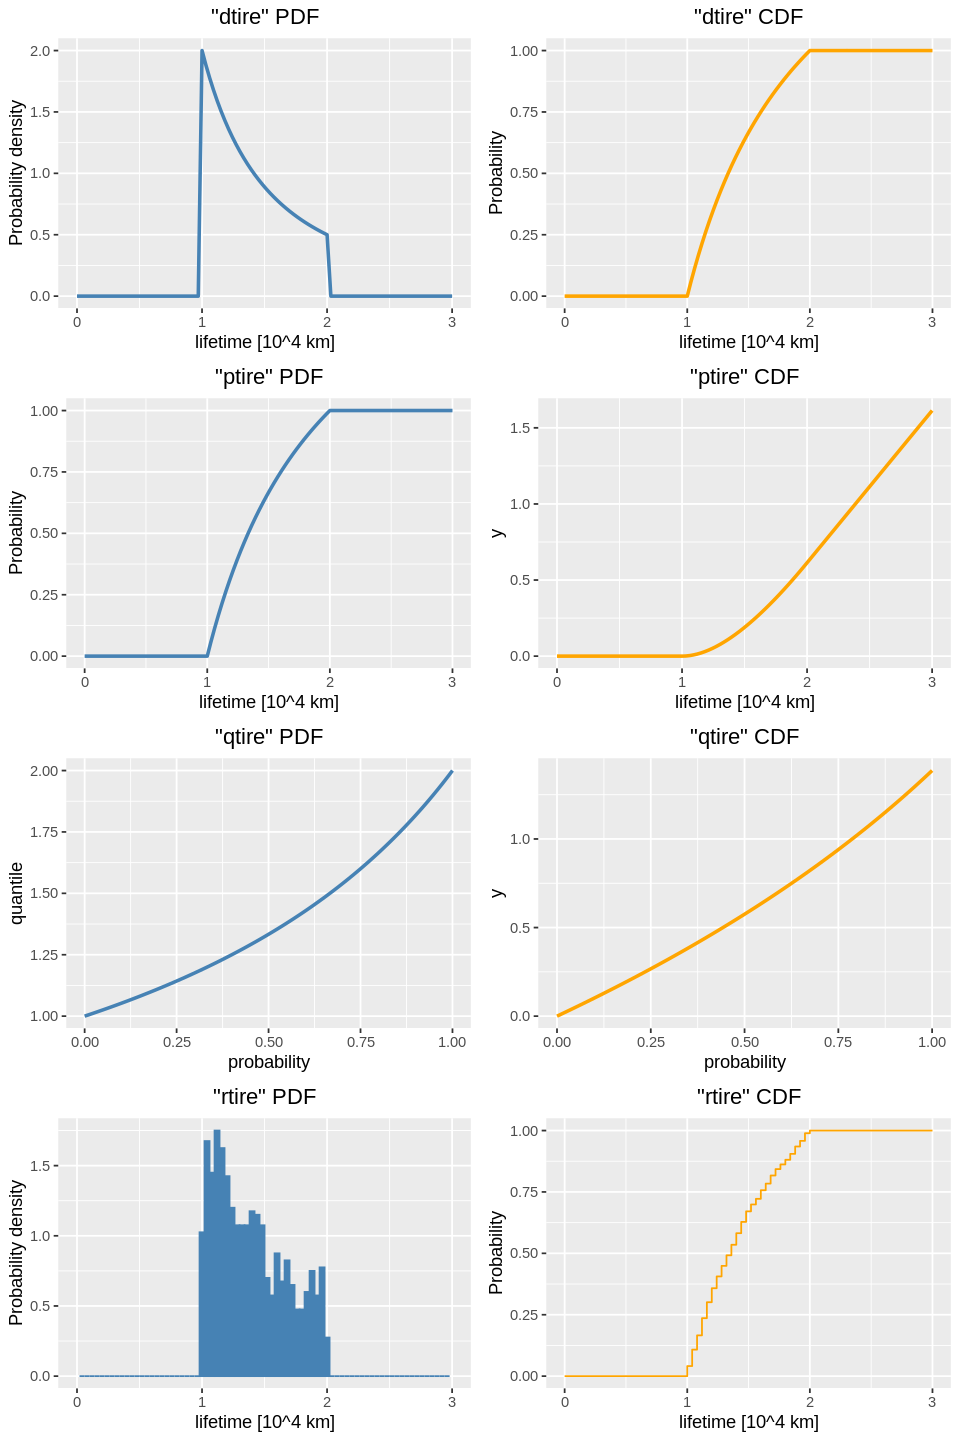

In [11]:
# set random seed for reproducibility
set.seed(1234)

options(repr.plot.width=8, repr.plot.height=12)

# plots for dtire
x    <- seq(0,3,length.out=100)
df_p <- data.frame(x=x, y=dtire(x))
df_c <- data.frame(x=x, y=sapply(x, function(x) integrate(dtire, lower=min(0, x), upper=x)$value))

p1 <- ggplot(df_p, aes(x=x, y=y)) +
      geom_line(color='steelblue', size=1) +
      labs(title='"dtire" PDF', x='lifetime [10^4 km]', y='Probability density') +
      theme(plot.title=element_text(hjust=0.5))
p2 <- ggplot(df_c, aes(x=x, y=y)) +
      geom_line(color='orange', size=1) +
      labs(title='"dtire" CDF', x='lifetime [10^4 km]', y='Probability') +
      theme(plot.title=element_text(hjust=0.5))

# plots for ptire
df_p <- data.frame(x=x, y=ptire(x))
df_c <- data.frame(x=x, y=sapply(x, function(x) integrate(ptire, lower=min(0, x), upper=x)$value))

p3 <- ggplot(df_p, aes(x=x, y=y)) +
      geom_line(color='steelblue', size=1) +
      labs(title='"ptire" PDF', x='lifetime [10^4 km]', y='Probability') +
      theme(plot.title=element_text(hjust=0.5))
p4 <- ggplot(df_c, aes(x=x, y=y)) +
      geom_line(color='orange', size=1) +
      labs(title='"ptire" CDF', x='lifetime [10^4 km]', y='y') +
      theme(plot.title=element_text(hjust=0.5))

# plots for qtire
x    <- seq(0, 1, length.out=100)
df_p <- data.frame(x=x, y=qtire(x))
df_c <- data.frame(x=x, y=sapply(x, function(x) integrate(qtire, lower=min(0, x), upper=x)$value))

p5 <- ggplot(df_p, aes(x=x, y=y)) +
      geom_line(color='steelblue', size=1) +
      labs(title='"qtire" PDF', x='probability', y='quantile') +
      theme(plot.title=element_text(hjust=0.5))
p6 <- ggplot(df_c, aes(x=x, y=y)) +
      geom_line(color='orange', size=1) +
      labs(title='"qtire" CDF', x='probability', y='y') +
      theme(plot.title=element_text(hjust=0.5))

# plots for rtire
df_p <- data.frame(x=rtire(1000))
binwidth=0.04

p7 <- ggplot(df_p, aes(x=x, y=after_stat(density))) +
      geom_histogram(color='steelblue', fill='steelblue', binwidth=binwidth) +
      labs(title='"rtire" PDF', x='lifetime [10^4 km]', y='Probability density') +
      theme(plot.title=element_text(hjust=0.5)) +
      xlim(0, 3)

p8 <- ggplot(ggplot_build(p7)$data[[1]], aes(x=x, y=cumsum(density)*binwidth)) +
      geom_step(color='orange') +
      labs(title='"rtire" CDF', x='lifetime [10^4 km]', y='Probability') +
      theme(plot.title=element_text(hjust=0.5))

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol=2)

## b)

In [287]:
cat("Prob. to last less than 15000 km:", ptire(1.5), end='\n')

Prob. to last less than 15000 km: 0.6666667 


## c)

In [12]:
# set random seed for reproducibility
set.seed(1234)

# define theoretical values as reference
mean_th <- 2*log(2)*10^4
var_th  <- (2*10^8-mean_th^2)

# generate data
x <- rtire(3000)*10^4

# compute experimental values
mean <- mean(x)
var  <- mean(x^2) - mean^2

cat("Requested variables + theoretical expectation as reference in [km]:", end='\n')
data.frame(theor=c(mean_th, var_th), exper=c(mean, var), row.names=c('mean', 'variance'))

Requested variables + theoretical expectation as reference in [km]: 


,theor,exper
,<dbl>,<dbl>
mean,13862.94,13872.38
variance,7818794.43,7741327.95
